In [1]:
import sys, os
sys.path.append(os.path.abspath("."))
sys.path.append(os.path.abspath(".."))
from yahoo_data.services.get_ta_indicators import GenerateTechnicalIndicators
from yahoo_data.services.get_pca import GeneratePCAByGrouping
from data_analysis.useful_defaults import GROUPS
technical_indicators_petr4_df = GenerateTechnicalIndicators(
    'PETR4.SA',
    '2015-01-01',
    '2020-01-01'
).run_with_default_params()
technical_indicators_petr4_df = technical_indicators_petr4_df.dropna()
from yahoo_data.services.get_pca import GeneratePCAByGrouping

groups = GROUPS

from data_analysis.services.stock_preprocessor import StockPreprocessor

petr4_1_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    1,
    '2020-01-01'
)
petr4_3_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    3,
    '2020-01-01'
)
petr4_5_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    5,
    '2020-01-01'
)



Mean Absolute Error: 0.02
Mean Absolute Error / Média 9.3

RMSE:  0.032
Média do resultado financeiro: 0.00247


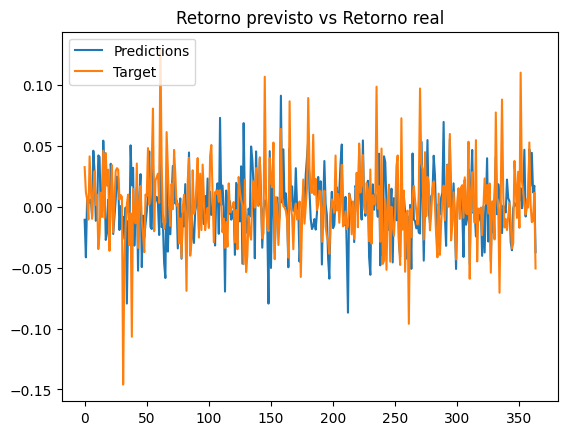

% Acerto de tendencia: 0.6703296703296703


In [2]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_1_days, 'Close PnL 1 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

Mean Absolute Error: 0.03
Mean Absolute Error / Média 4.37

RMSE:  0.046
Média do resultado financeiro: 0.0076


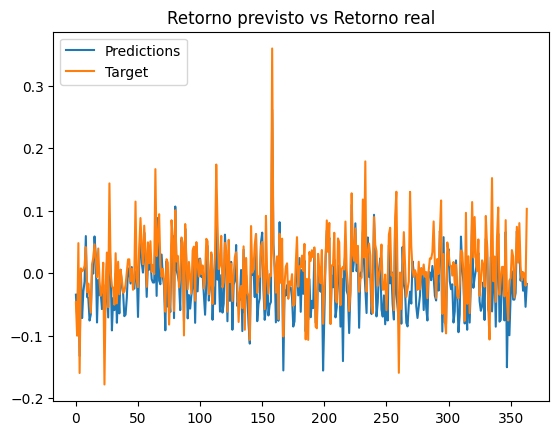

% Acerto de tendencia: 0.739010989010989


In [3]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_3_days, 'Close PnL 3 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

Mean Absolute Error: 0.03
Mean Absolute Error / Média 3.74

RMSE:  0.048
Média do resultado financeiro: 0.00872


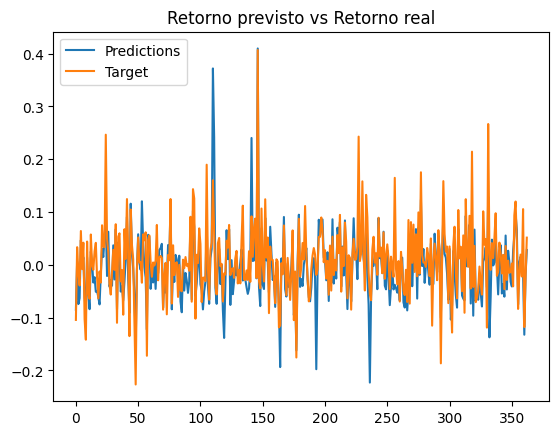

% Acerto de tendencia: 0.8181818181818182


In [4]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_5_days, 'Close PnL 5 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

**TESTES COM OTIMIZAÇÃO DE PORTFÓLIO**

In [1]:
import sys, os
sys.path.append(os.path.abspath("."))
sys.path.append(os.path.abspath(".."))
from portfolio_management.services.scipy_optimizator import SciPyOptimizator
from data_analysis.services import RandomForestsWrapper, StockPreprocessor
import pandas as pd

# stocks = ['PETR4.SA', 'WEGE3.SA', 'ITUB4.SA', 'VALE3.SA', 'B3SA3.SA', 'BEEF3.SA']
stocks =  ['PETR4.SA', 'WEGE3.SA', 'ITUB4.SA']
df_list = []
for stock in stocks:
    preprocessed_stock = StockPreprocessor.preprocess(
        stock,
        '2015-01-01',
        'Close',
        5,
        '2020-01-01'
    )
    predicted_stock = RandomForestsWrapper().run(preprocessed_stock, 'Close PnL 5 days')
    predictions = predicted_stock['predictions']
    test_target = predicted_stock['test_target']

    data = {'Predictions': predictions, 'Actual': test_target}
    direction_count = 0
    for index in range(len(predictions)):
        if predictions[index] > 0 and test_target[index] > 0:
            direction_count += 1
        if predictions[index] < 0 and test_target[index] < 0:
            direction_count += 1
            
    print(f'% Acerto de tendencia {stock}: {direction_count/len(predictions)}')
    actual_vs_predicted_df = pd.DataFrame(data)
    df_list.append(actual_vs_predicted_df)


% Acerto de tendencia PETR4.SA: 0.8181818181818182
% Acerto de tendencia WEGE3.SA: 0.8264462809917356
% Acerto de tendencia ITUB4.SA: 0.8071625344352618


In [2]:
SciPyOptimizator().optimize(dfs=df_list, tickers=stocks, price_column='Predictions')

[[-0.08653793  0.03365892 -0.07332142]]
[[-0.08653793  0.03365892 -0.07332142]] @ var1 + -param5 @ QuadForm(var1, [[2.10888047e-05 4.03179114e-06 1.06847822e-05]
 [4.03179114e-06 1.80154379e-06 2.36952980e-06]
 [1.06847822e-05 2.36952980e-06 6.89279958e-06]])
CONCAVE
HOPEFULLY FINAL WEIGHTS!!
[5.55343978e-23 1.00000000e+00 5.55217872e-23]
[[ 0.00598096 -0.03353828  0.05959168]]
[[ 0.00598096 -0.03353828  0.05959168]] @ var43 + -param47 @ QuadForm(var43, [[2.10888047e-05 4.03179114e-06 1.06847822e-05]
 [4.03179114e-06 1.80154379e-06 2.36952980e-06]
 [1.06847822e-05 2.36952980e-06 6.89279958e-06]])
CONCAVE
HOPEFULLY FINAL WEIGHTS!!
[-1.11016200e-22 -1.11018742e-22  1.00000000e+00]
[[-0.07389338  0.00930417 -0.03695507]]
[[-0.07389338  0.00930417 -0.03695507]] @ var85 + -param89 @ QuadForm(var85, [[2.10888047e-05 4.03179114e-06 1.06847822e-05]
 [4.03179114e-06 1.80154379e-06 2.36952980e-06]
 [1.06847822e-05 2.36952980e-06 6.89279958e-06]])
CONCAVE
HOPEFULLY FINAL WEIGHTS!!
[-2.22093836e-2